In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumenduray99/render-employee-wellness-prediction")


In [113]:
df = pd.read_csv(path + "/Data/employee_train_dataset_main.csv")

In [114]:
df.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,01-01-2021 09:14,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,01-01-2021 09:26,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,01-01-2021 09:28,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,01-01-2021 09:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,01-01-2021 09:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       50000 non-null  int64 
 1   Timestamp                  50000 non-null  object
 2   Age                        50000 non-null  int64 
 3   Gender                     50000 non-null  object
 4   Country                    50000 non-null  object
 5   state                      30286 non-null  object
 6   self_employed              49118 non-null  object
 7   family_history             50000 non-null  object
 8   treatment                  50000 non-null  object
 9   work_interfere             38754 non-null  object
 10  no_employees               50000 non-null  object
 11  remote_work                50000 non-null  object
 12  tech_company               50000 non-null  object
 13  benefits                   49393 non-null  object
 14  care_o

In [116]:
df.isnull().sum()

,0
S.No,0
Timestamp,0
Age,0
Gender,0
Country,0
state,19714
self_employed,882
family_history,0
treatment,0
work_interfere,11246


In [117]:
df.shape

(50000, 28)

In [118]:
#drop comment. SR No, state, leave
df.drop(['S.No', 'state','comments','leave'], axis=1, inplace=True)

In [119]:
# replace null value with most frequent value
df['work_interfere'].fillna((df['work_interfere'].mode()[0]),inplace = True)
df['self_employed'].fillna((df['self_employed'].mode()[0]), inplace=True)
df['benefits'].fillna((df['benefits'].mode()[0]), inplace=True)
df['wellness_program'].fillna((df['wellness_program'].mode()[0]), inplace=True)

<ipython-input-119-effb0cb01a1f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna((df['work_interfere'].mode()[0]),inplace = True)
<ipython-input-119-effb0cb01a1f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  50000 non-null  object
 1   Age                        50000 non-null  int64 
 2   Gender                     50000 non-null  object
 3   Country                    50000 non-null  object
 4   self_employed              50000 non-null  object
 5   family_history             50000 non-null  object
 6   treatment                  50000 non-null  object
 7   work_interfere             50000 non-null  object
 8   no_employees               50000 non-null  object
 9   remote_work                50000 non-null  object
 10  tech_company               50000 non-null  object
 11  benefits                   50000 non-null  object
 12  care_options               50000 non-null  object
 13  wellness_program           50000 non-null  object
 14  seek_h

In [121]:
# check if any column has not valid data
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 20)

Column: Timestamp
Timestamp
06-02-2023 14:02    3
28-09-2023 17:51    3
09-12-2023 16:14    3
06-12-2021 13:29    3
29-04-2023 10:33    3
                   ..
08-01-2022 17:44    1
08-01-2022 17:54    1
08-01-2022 18:00    1
08-01-2022 18:05    1
08-01-2022 15:48    1
Name: count, Length: 48178, dtype: int64
--------------------
Column: Age
Age
 29             3512
 32             3055
 33             3007
 27             2964
 26             2941
 31             2691
 28             2671
 30             2668
 34             2475
 35             2326
 25             2284
 23             1968
 24             1846
 37             1719
 36             1477
 38             1453
 39             1254
 40             1184
 43             1109
 22              971
 42              800
 41              729
 21              728
 45              438
 19              387
 44              363
 18              343
 46              316
 48              242
 50              241
 20              193
 

In [122]:
df[(df['Age']<18)]['Age'].count()
df[(df['Age'] >60)]['Age'].count()# We can drop these values

np.int64(242)

In [123]:
df = df[(df['Age'] > 18) & (df['Age'] <= 60)]

In [124]:
df['Gender'] = df['Gender'].replace(["female","F","f","woman","Femake","Woman","Female "],"Female")

<ipython-input-124-3fb62bc25ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace(["female","F","f","woman","Femake","Woman","Female "],"Female")


In [125]:
df['Gender'] = df['Gender'].replace(["male", "m", "M", "Male ", "Man","Mal","Malr", "mail", "malr", "msle", "Guy (-ish) ^_^", "make", "maile", "Male-ish","Make", "Mail"], "Male")

In [126]:
df['Gender'].unique() #Replace Uneven value of Male and Female

array(['Female', 'Male', 'Trans-female', 'Cis Female', 'Cis Male',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Nah', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'cis-female/femme',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'Female (cis)', 'cis male'],
      dtype=object)

In [127]:
# Replace different Transgender term to unique value.
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Transgender'
df['Gender'].unique()

array(['Female', 'Male', 'Transgender'], dtype=object)

In [128]:
#Convert no_column to even group
def clean_employee(value):
  value = str(value).strip()

  if value in ['05-Jan']:
    return '1-05'
  if value in ['25-Jun']:
    return '06-25'
  if value == "More than 1000":
    return '1000+'
  return value


In [129]:
#apply into no_employee column
df['no_employees'] = df['no_employees'].apply(clean_employee)

In [130]:
df['no_employees'].unique()

array(['06-25', '1000+', '26-100', '100-500', '1-05', '500-1000'],
      dtype=object)

In [131]:
ordinal_mapping = {
    '1-05': 1,
    '06-25':2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    '1000+': 6
}
df['no_employees_encoded'] = df['no_employees'].map(ordinal_mapping)
df.drop('no_employees', axis=1)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,...,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,no_employees_encoded
0,01-01-2021 09:14,37,Female,United States,No,No,Yes,Often,No,Yes,...,Yes,No,No,Some of them,Yes,No,Maybe,Yes,No,2
1,01-01-2021 09:26,44,Male,United States,No,No,No,Rarely,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,6
2,01-01-2021 09:28,32,Male,Canada,No,No,No,Rarely,No,Yes,...,Don't know,No,No,Yes,Yes,Yes,Yes,No,No,2
3,01-01-2021 09:29,31,Male,United Kingdom,No,Yes,Yes,Often,No,Yes,...,No,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,3
4,01-01-2021 09:30,31,Male,United States,No,No,No,Never,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,31-12-2023 18:11,32,Male,United Kingdom,No,Yes,Yes,Sometimes,Yes,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,2
49996,31-12-2023 18:13,47,Male,United States,No,Yes,Yes,Sometimes,No,Yes,...,Don't know,No,No,Some of them,Yes,No,Yes,Yes,No,6
49997,31-12-2023 18:18,22,Male,United States,No,No,No,Sometimes,No,Yes,...,Yes,No,No,Some of them,Yes,No,Maybe,Yes,No,6
49998,31-12-2023 18:46,33,Female,United States,No,No,Yes,Sometimes,Yes,Yes,...,Don't know,No,No,Some of them,Some of them,No,No,Don't know,No,5


In [132]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')


In [133]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Timestamp'] = df['Timestamp'].dt.year

In [134]:
df['Timestamp']

,Timestamp
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
49995,2023
49996,2023
49997,2023
49998,2023


In [135]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 20)

Column: Timestamp
Timestamp
2022    16463
2021    16430
2023    16329
Name: count, dtype: int64
--------------------
Column: Age
Age
29    3512
32    3055
33    3007
27    2964
26    2941
31    2691
28    2671
30    2668
34    2475
35    2326
25    2284
23    1968
24    1846
37    1719
36    1477
38    1453
39    1254
40    1184
43    1109
22     971
42     800
41     729
21     728
45     438
19     387
44     363
46     316
48     242
50     241
20     193
51     192
49     192
57     146
55     146
54     146
56     145
47      97
60      49
58      49
53      48
Name: count, dtype: int64
--------------------
Column: Gender
Gender
Male           38791
Female          9389
Transgender     1042
Name: count, dtype: int64
--------------------
Column: Country
Country
United States             30258
United Kingdom             7263
Canada                     3036
Germany                    1789
Australia                   845
Netherlands                 820
Ireland                     630


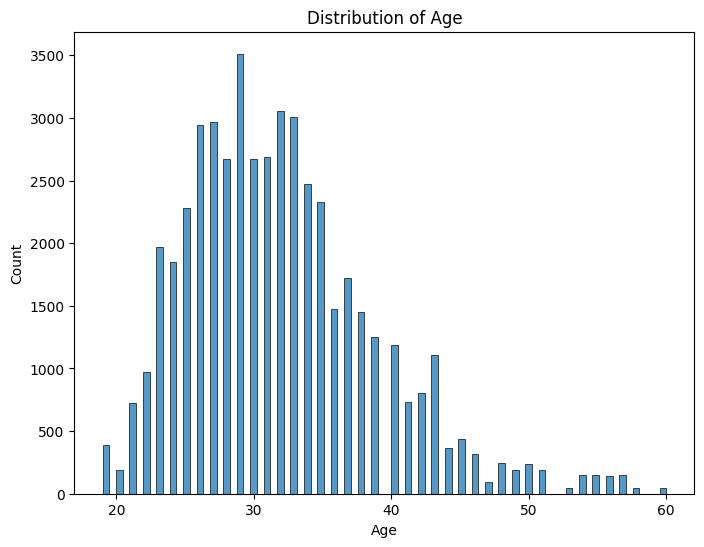

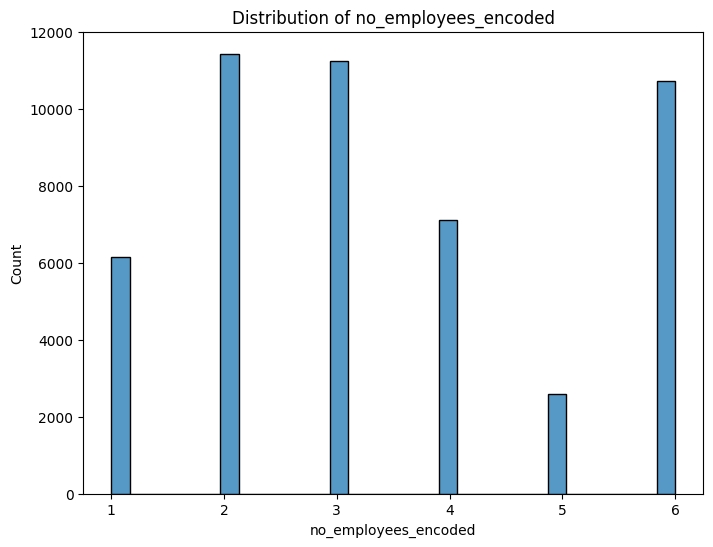

In [136]:
# Numerical Analysis
for col in ['Age','no_employees_encoded']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()



1.  Majority of Employees are in age range of 23 to 35.




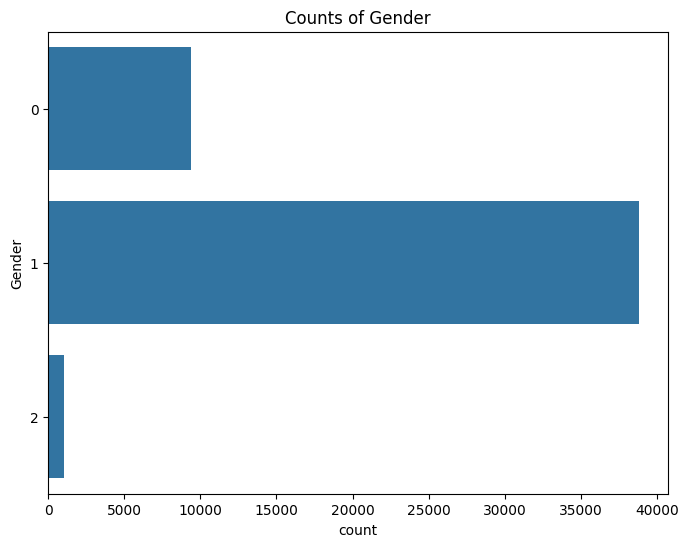

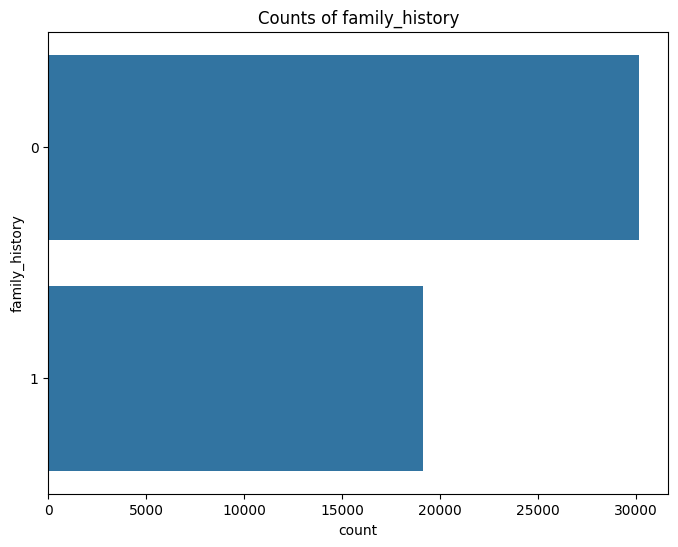

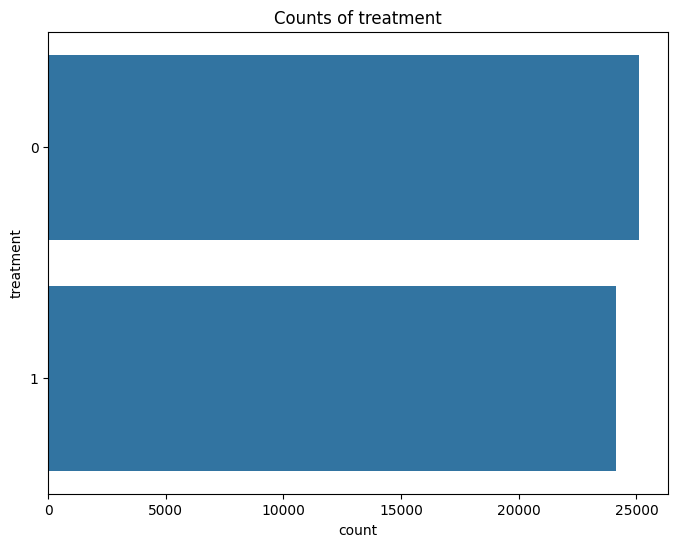

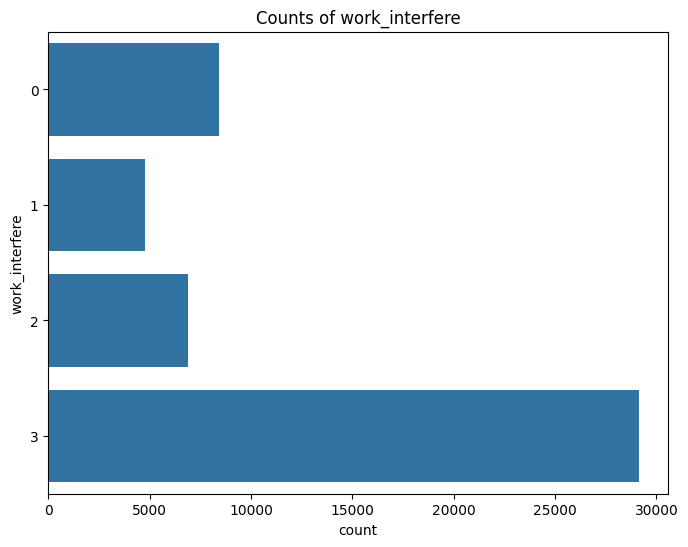

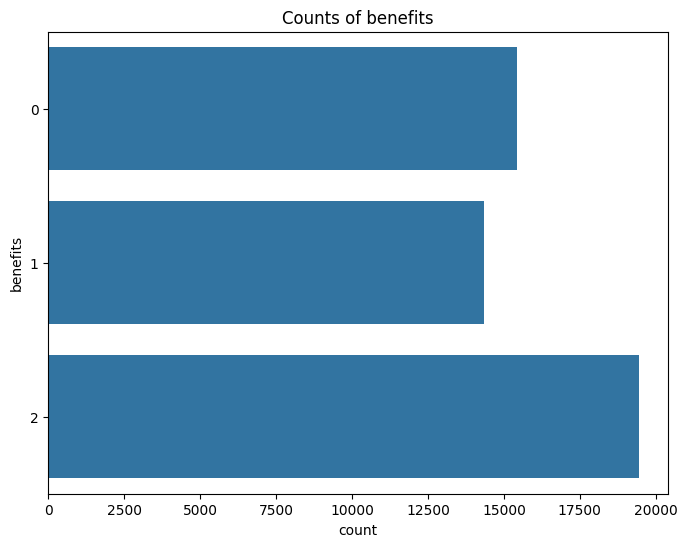

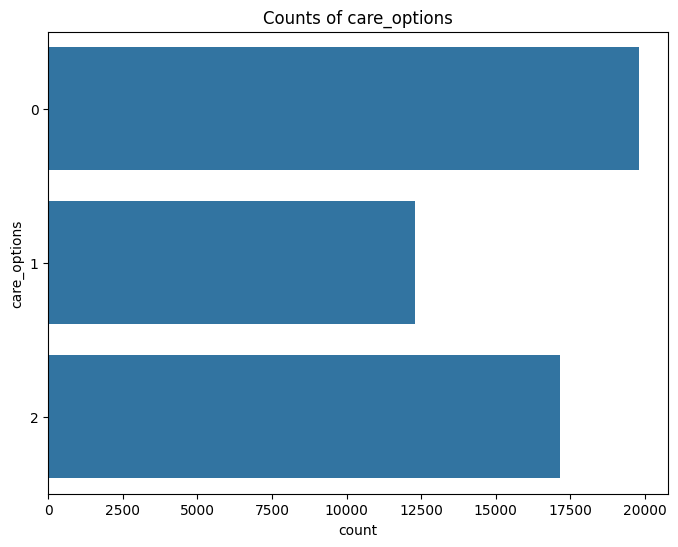

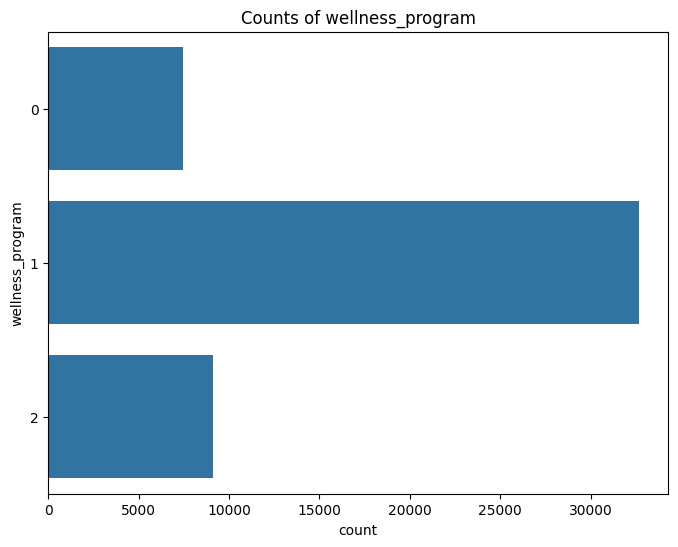

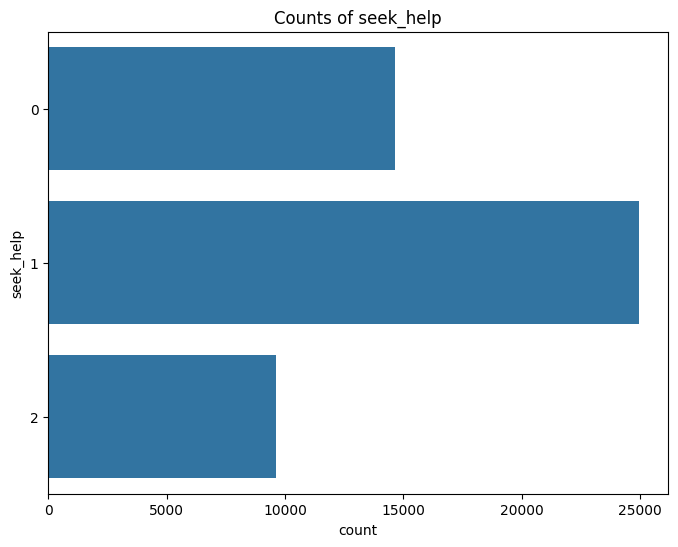

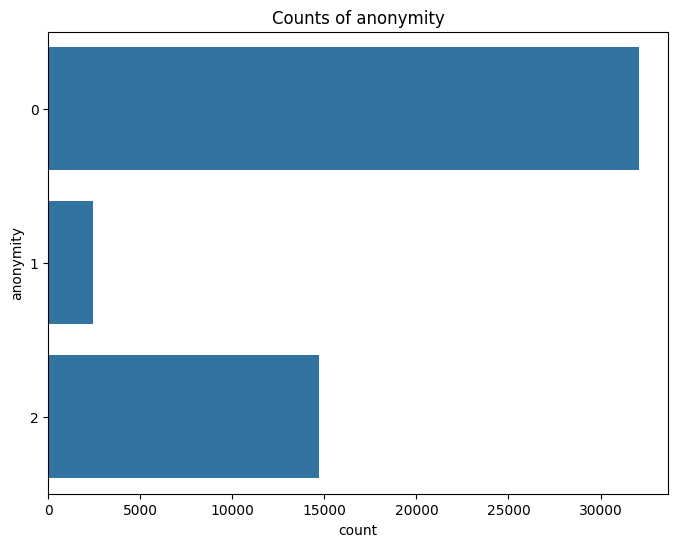

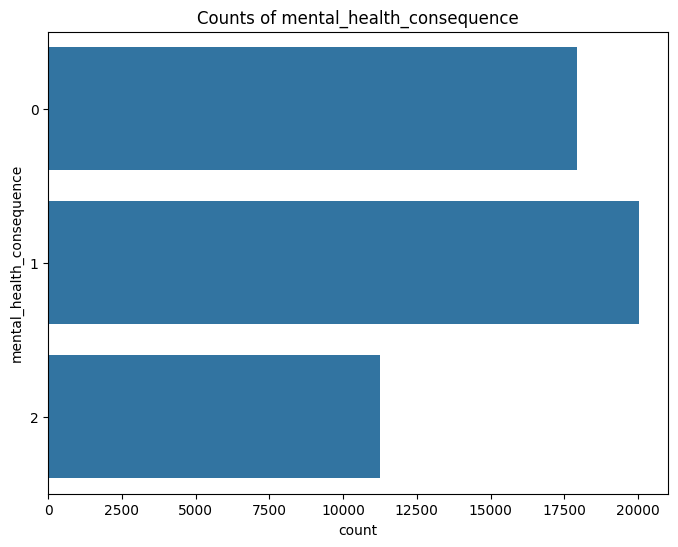

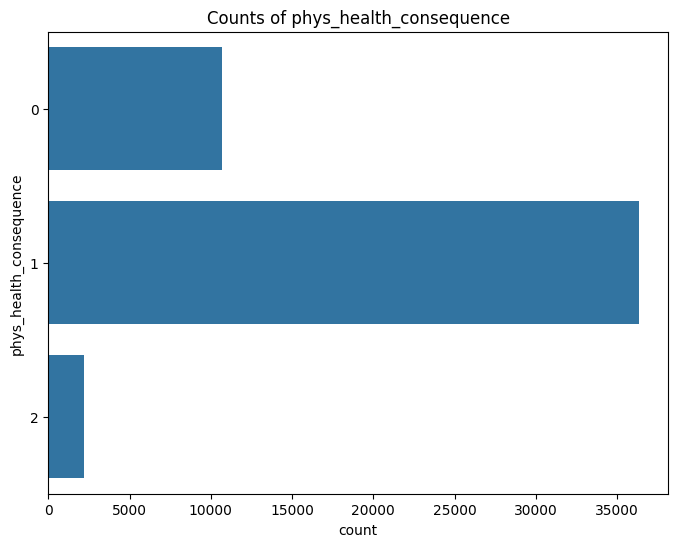

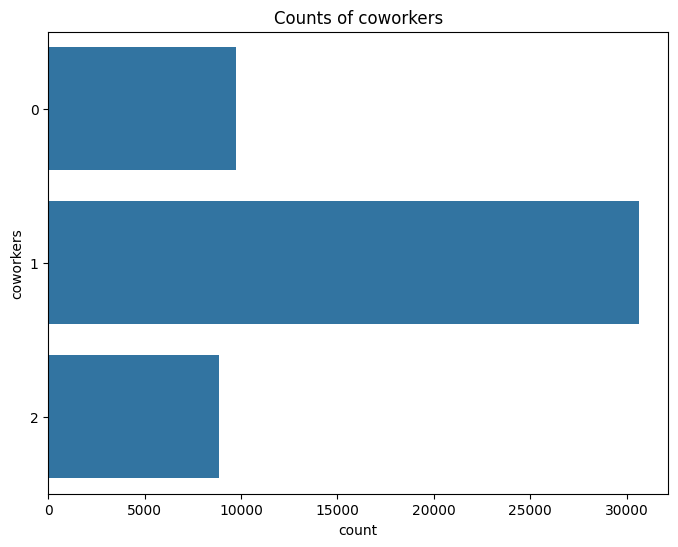

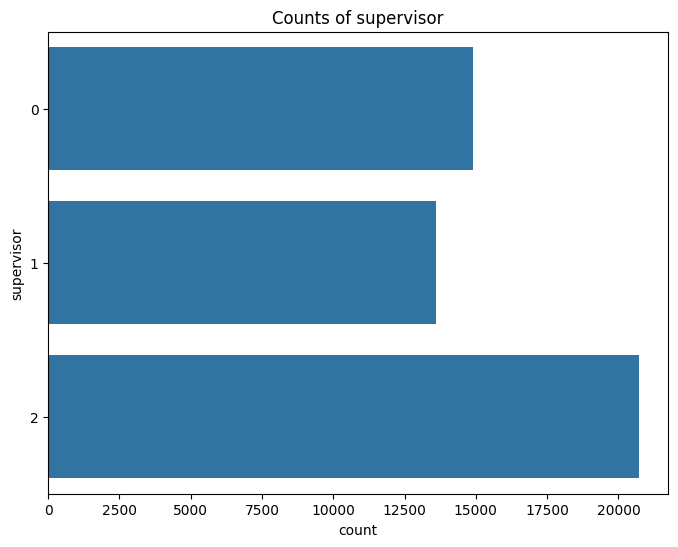

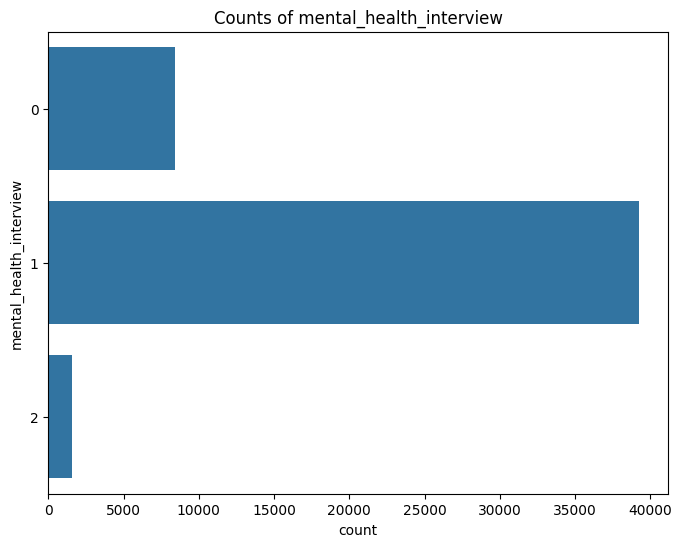

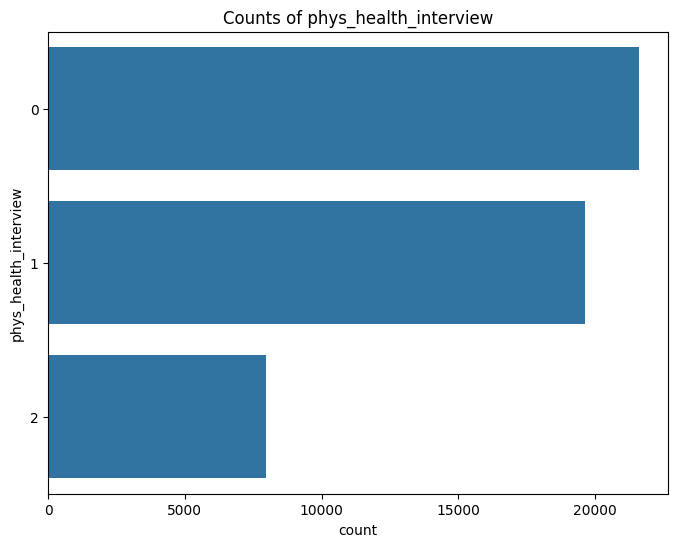

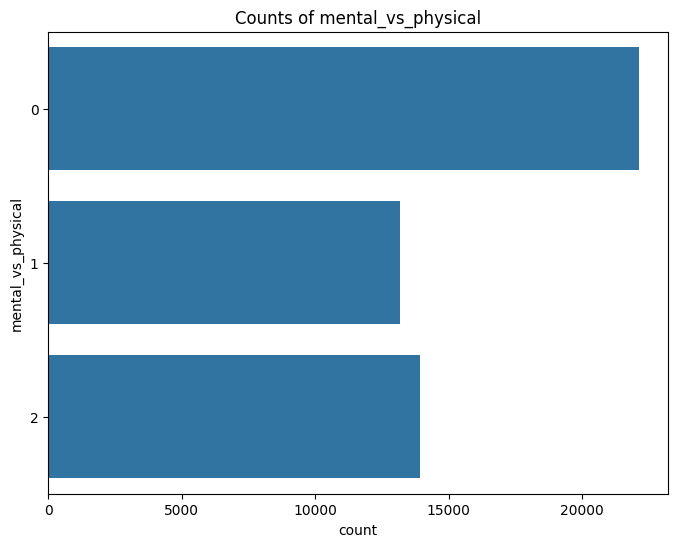

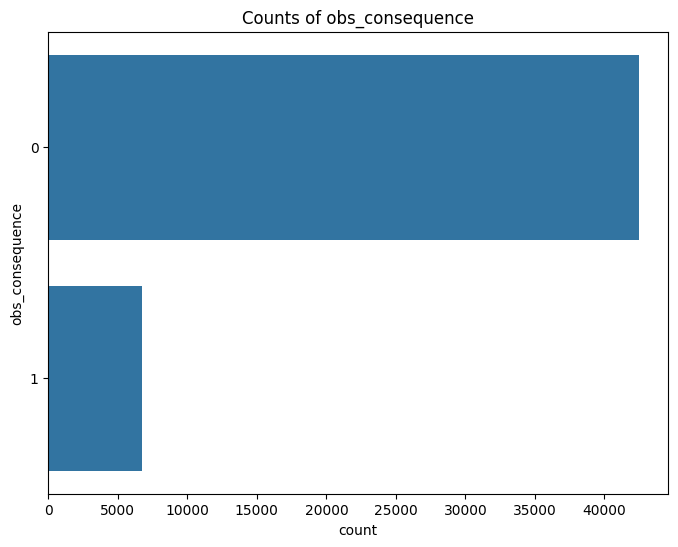

In [160]:
# Categorical features
for col in ['Gender', 'family_history', 'treatment', 'work_interfere', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col])  # Use y for better readability if many categories
    plt.title(f'Counts of {col}')
    plt.show()




1.   Uneven distribution found where eother Yes or No dominates.
2.   Also unpredictable answer also found like Don't know , Maybe and have more counts in that may cause degrade the probability of precise prediction score of model.



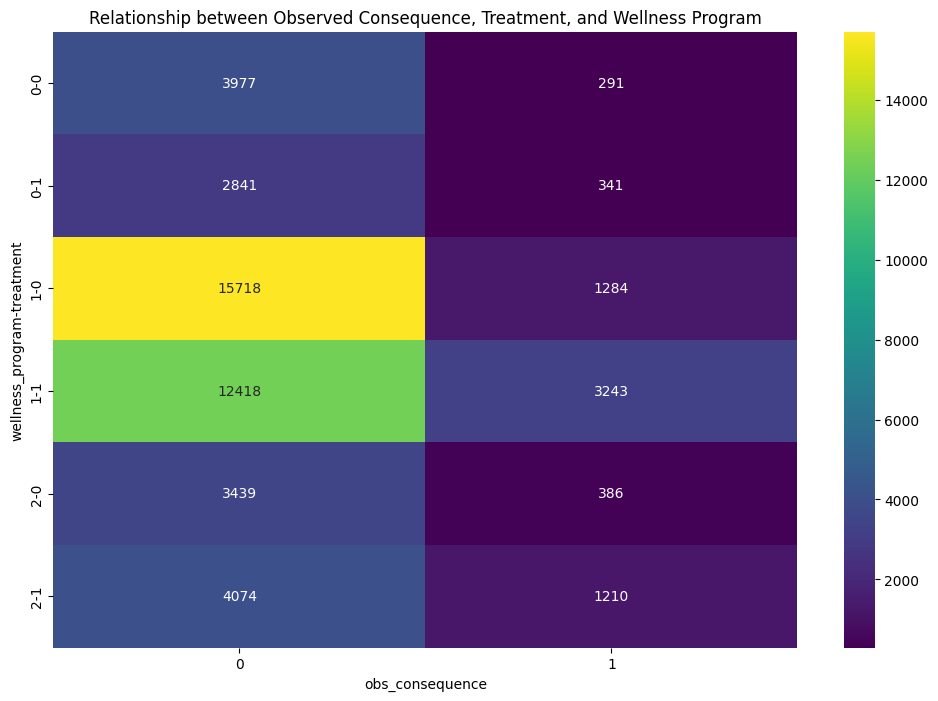

In [161]:
ct = pd.crosstab([df['wellness_program'], df['treatment']], df['obs_consequence'])

# Visualize the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, cmap='viridis', fmt='g')
plt.title('Relationship between Observed Consequence, Treatment, and Wellness Program')
plt.show()


'No-treatment' finds 'observed consequence'.Means lack of awareness on wellness program.Same found in Don't know.

But where both wellness programm and treatment are taken there also consequences observed.

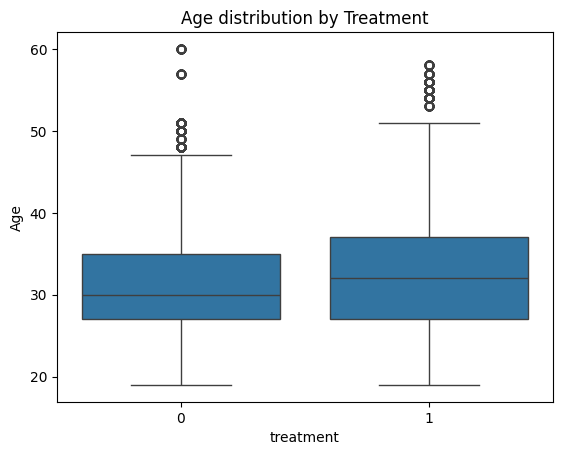

In [162]:
# Numerical vs. categorical
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age distribution by Treatment')
plt.show()

Age attribute found some outliers above 50 but we can consider as experienced or mentor of company.

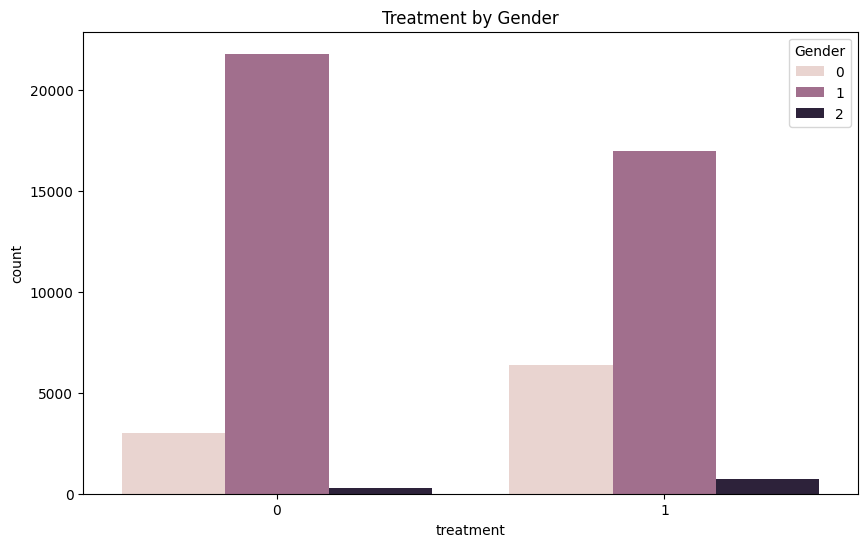

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(x='treatment', hue='Gender', data=df)
plt.title('Treatment by Gender')
plt.show()

Treatment by Gender also suggest that many employees does not served treartment.

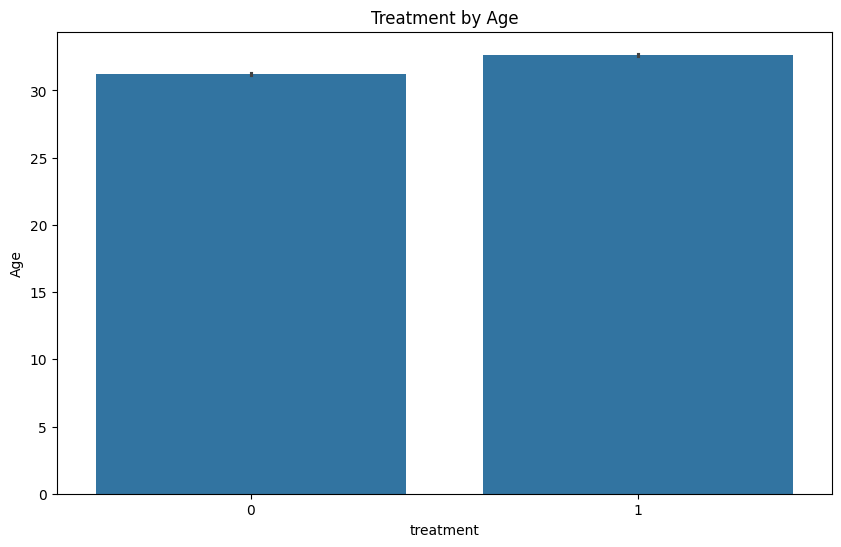

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(x='treatment', y='Age', data=df)
plt.title('Treatment by Age')
plt.show()

Gender and Age Columns works well to predict if treatment is needed.

In [174]:
def support_score(row):
    score = 0
    if row['coworkers'] in ['Yes', 'Some of them']:
        score += 1
    if row['supervisor'] == 'Yes':
        score += 1
    return score

df['support_score'] = df.apply(support_score, axis=1)


In [175]:
df['flexibility_flag'] = ((df['remote_work'] == 'Yes') & (df['work_interfere'].isin(['Rarely', 'Never']))).astype(int)

In [176]:
df['risk_score'] = df['family_history'] + df['work_interfere'] + df['mental_health_consequence']

# Add above three relevant features but accuracy does not improve so discarded.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score,precision_score
from sklearn.preprocessing import LabelEncoder

In [182]:
target = 'treatment'
features = [
    'Age', 'Gender', 'Country', 'self_employed', 'family_history','Timestamp',
    'mental_health_consequence',
    'benefits', 'care_options', 'wellness_program', 'seek_help',
     'phys_health_consequence',
     'mental_health_interview',
    'phys_health_interview', 'mental_vs_physical',
    'no_employees_encoded', 'obs_consequence'  ]

In [183]:
f = df[features + [target]].dropna()

In [184]:
label_encoders = {}
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])
label_encoders[target] = le_target

In [186]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [187]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=9, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,zero_division=0)
    Classification_Report = classification_report(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,

    }
    print(Classification_Report)

    print(f"{model_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    #print(f"Classification Report: {classification_report:.4f}")
    print("-" * 30)

print("\nSummary of Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 20)


Training Decision Tree...
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5012
           1       0.89      0.83      0.86      4833

    accuracy                           0.87      9845
   macro avg       0.87      0.86      0.87      9845
weighted avg       0.87      0.87      0.87      9845

Decision Tree Performance:
  Accuracy: 0.8654
  F1 Score: 0.8584
  Precision: 0.8879
------------------------------
Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5012
           1       0.73      0.68      0.70      4833

    accuracy                           0.72      9845
   macro avg       0.72      0.71      0.71      9845
weighted avg       0.72      0.72      0.72      9845

Logistic Regression Performance:
  Accuracy: 0.7155
  F1 Score: 0.7001
  Precision: 0.7255
------------------------------
Training Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5012
           1       1.00      1.00      1.00      4833

    accuracy                           1.00      9845
   macro avg       1.00      1.00      1.00      9845
weighted avg       1.00      1.00      1.00      9845

Random Forest Performance:
  Accuracy: 0.9996
  F1 Score: 0.9996
  Precision: 0.9992
------------------------------
Training Gradient Boosting...
              precision    recall  f1-score   suppor

Here Random Forest and K-Nearest Neighbours gives highest precision so we choose one of them.

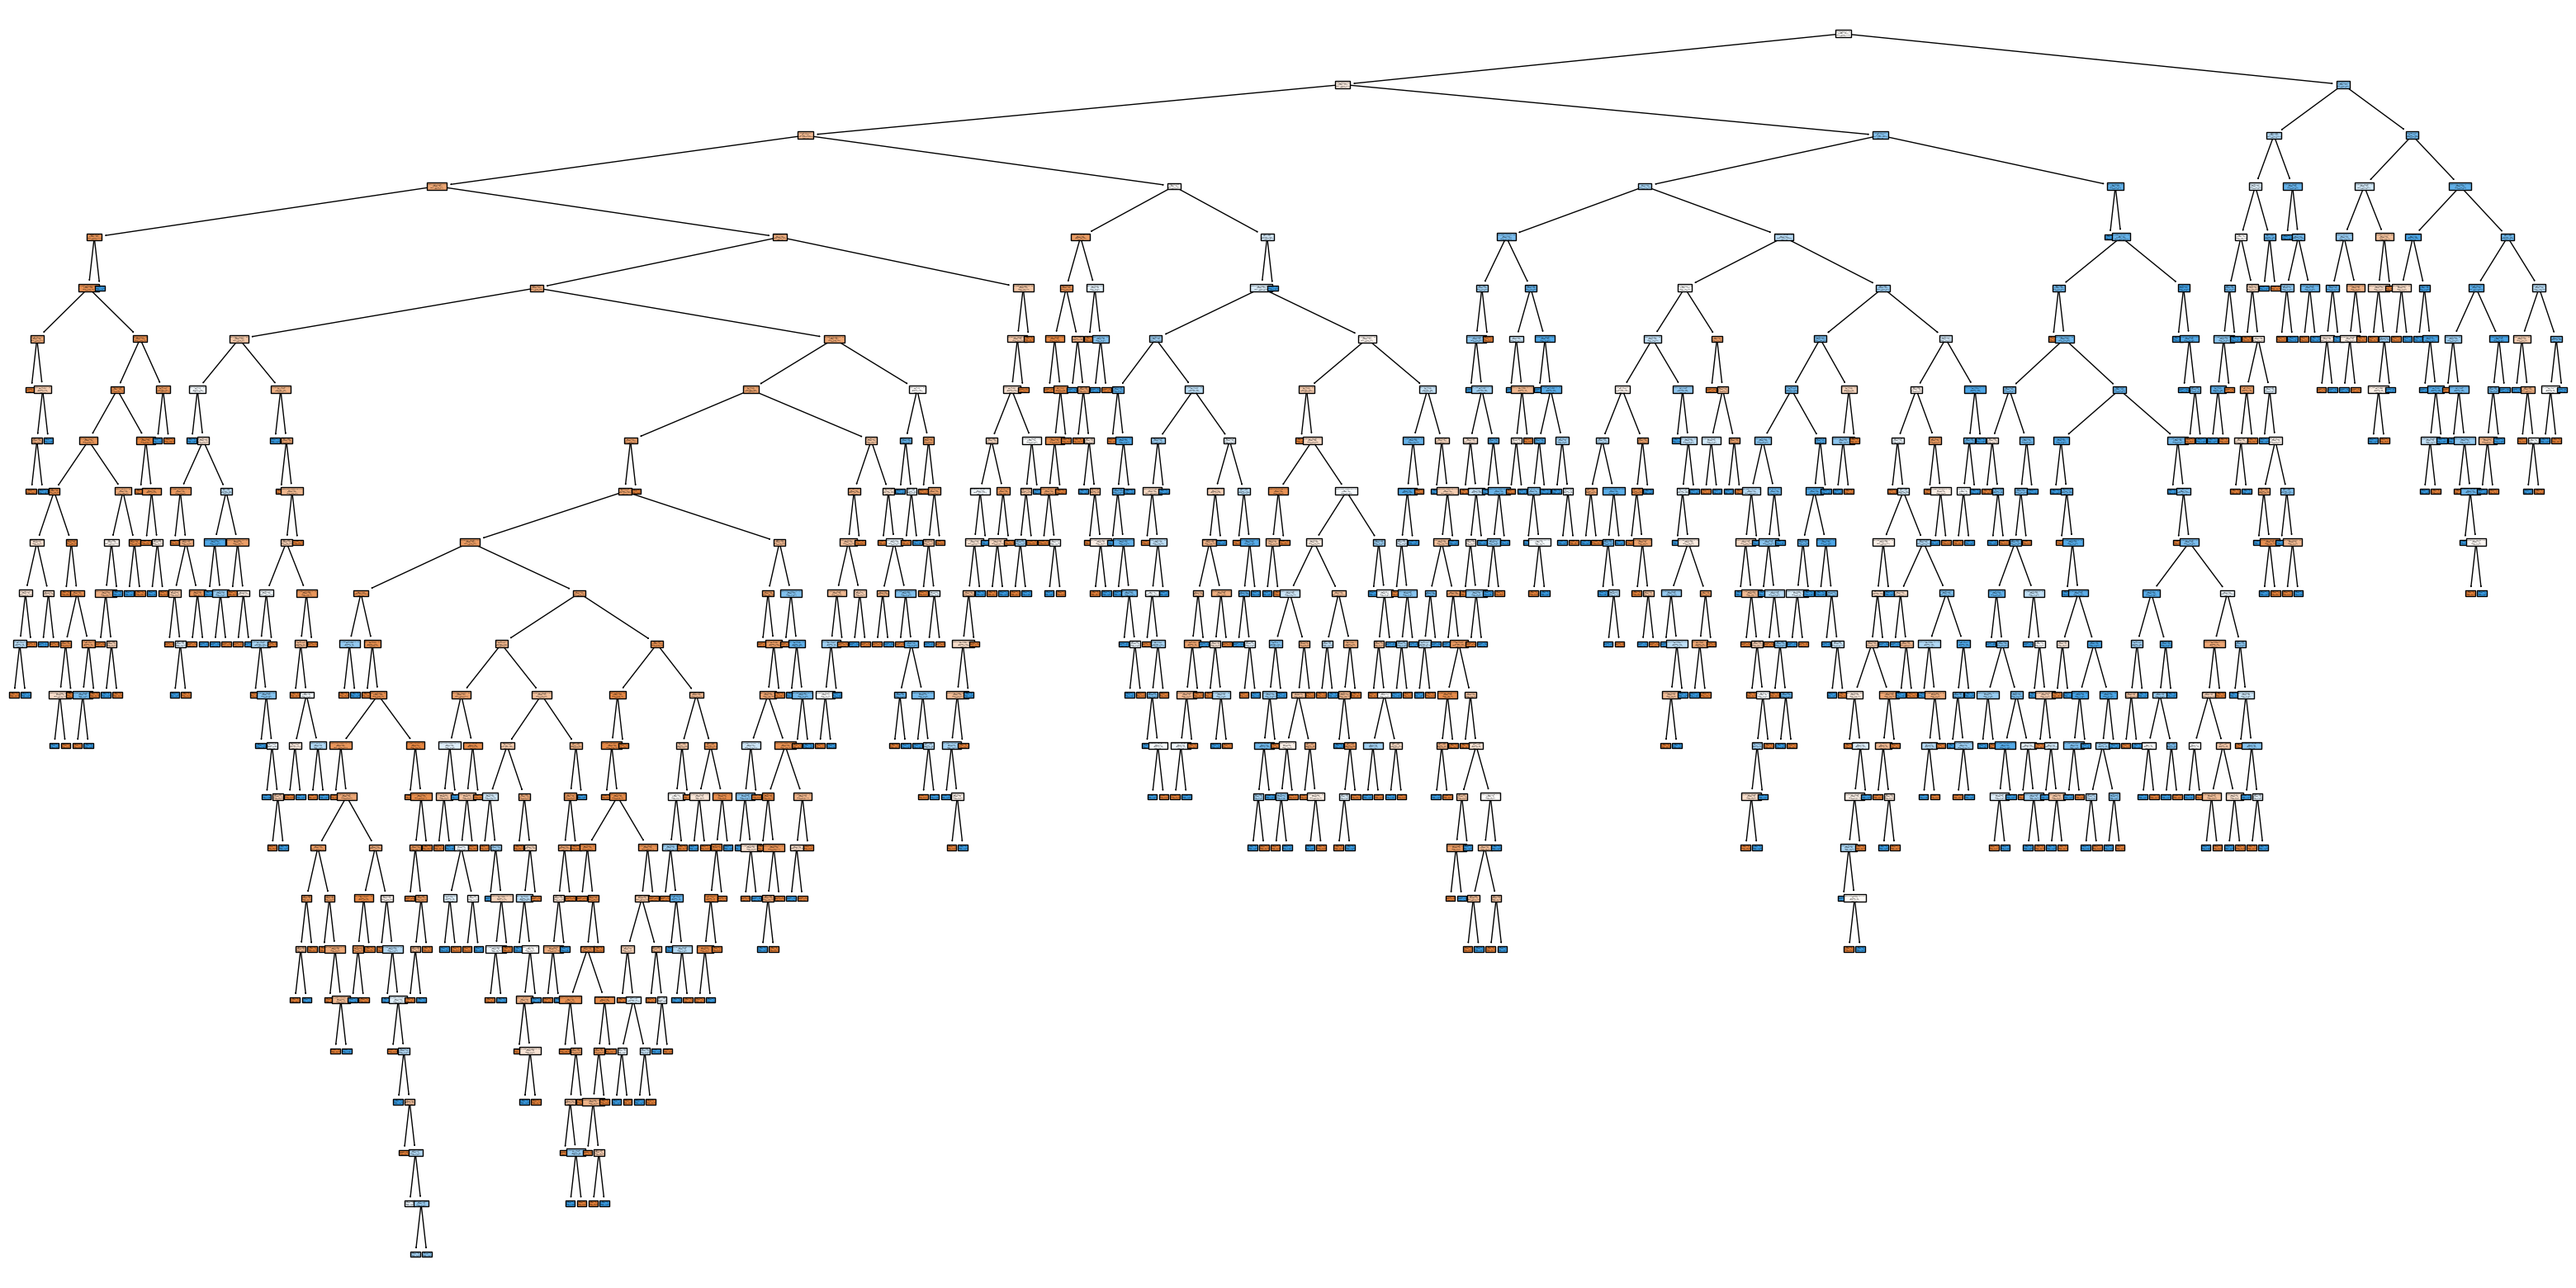

In [190]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
plot_tree(models['Random Forest'].estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [191]:
# Choose the best performing model
best_model = models['Random Forest']

# Predict treatment on test set
test_predictions = best_model.predict(X_test)

# Convert back to original labels
if target in label_encoders:
  test_predictions_labels = label_encoders[target].inverse_transform(test_predictions)

  # Create submission DataFrame
  submission = pd.DataFrame({
      'treatment': test_predictions_labels
      })

  # Save to CSV
  submission.to_csv("employee_test_predictions.csv", index=False)
  print("Predictions saved to employee_test_predictions.csv")

Predictions saved to employee_test_predictions.csv


<ipython-input-192-dc1ef47f51bf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y ='Feature', data=feature_df, palette='viridis', legend = False)


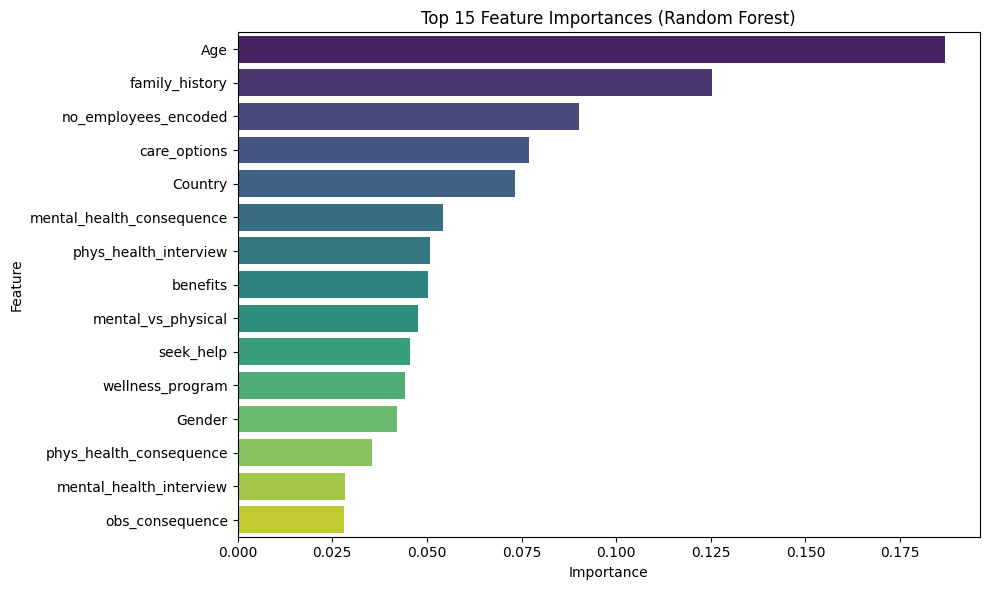

In [192]:
# Function to plot feature importance
def plot_feature_importance(model, X, model_name, top_n=15):
    importances = model.feature_importances_
    features = X.columns
    feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y ='Feature', data=feature_df, palette='viridis', legend = False)
    plt.title(f'Top {top_n} Feature Importances ({model_name})')
    plt.tight_layout()
    plt.show()

# Plot for Random Forest
plot_feature_importance(models['Random Forest'], X, 'Random Forest')

The most influential features include:

* Age of the employee

* Family history

* Company size (number of employees)

* Availability of mental health care options

* Employee's country of residence

* Perceived consequences of mental and physical health conditions

These variables demonstrate strong predictive power in identifying employees at risk or in need of mental health support.

# Strategic Recommendation:
Prioritize access to mental health care and promote awareness of available support.

Tailor wellness initiatives based on employee demographics and regional factors.

Encourage employees to respond with greater clarity in wellness assessments by educating them on the importance of providing specific and informed answers.

Build a culture of psychological safety that supports open and honest dialogue about mental health.

 Additionally, the analysis revealed a high frequency of ambiguous or uncertain responses such as “Maybe”, “Don’t know”, or “Some of them”. These vague answers reduce data clarity and can hinder accurate insights.

In [158]:
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']